# Shikari King

## Research question/interests
**How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?**

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import geoplot as gplt


In [3]:
# Loading the dataframes to be analyzed
# Fixing the name United States
Data2015 = pd.read_csv('../../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../../data/processed_2/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../../data/processed_2/Overall(With-year)_Clean_Data.csv')
DataAllRegion = pd.read_csv('../../data/processed_2/Overall(With-Region-Year)_Clean_Data.csv')

# Fixed the USA as it was named different for GeoPandas
datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022, DataCombine, DataAllYears]
for data in datasets:
    data['Country'] = data['Country'].replace('United States', 'United States of America')
datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022]
DataAllRegion.columns

Index(['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom to make life choices', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Social support',
       'Perceptions of corruption', 'Logged GDP per capita',
       'Healthy life expectancy', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita'],
      dtype='object')

In [4]:
import sys
sys.path.append('../code')

# Importing Functions to be used
import project_functions2 as pf

### Milestone 3: Exploratory Data Analysis

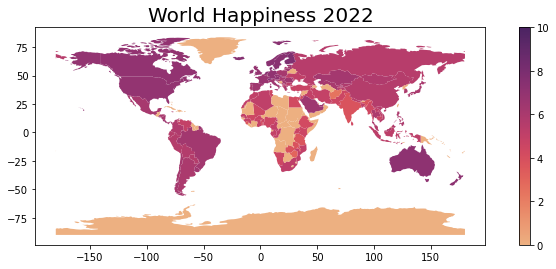

In [5]:
pf.create_world_map_happiness(Data2022,f'World Happiness 2022')

### The above image shows worldwide happiness in 2022 and I want to explore the reasons as to why some countries are much happier than others

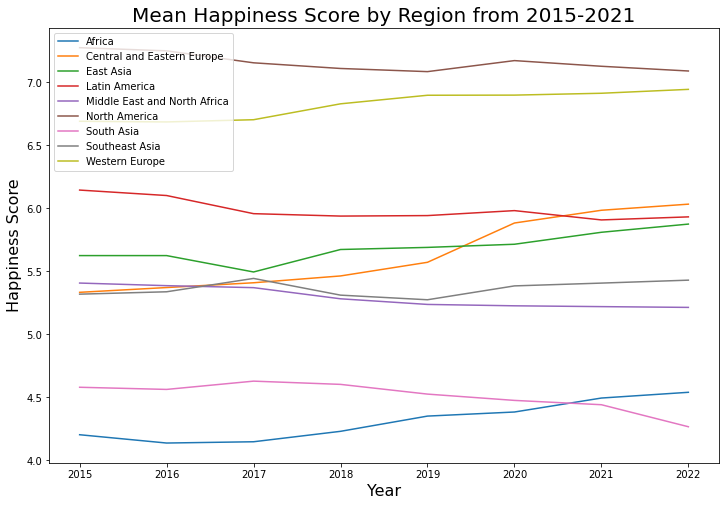

In [6]:
# Create a new dataframe with region-wise average happiness score for each year
region_data = DataAllRegion.groupby(['Year', 'Region'])['Happiness Score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for region in region_data['Region'].unique():
    # Get the data for the current region
    region_subset = region_data[region_data['Region'] == region]
    # Plot the region's data
    ax.plot(region_subset['Year'], region_subset['Happiness Score'], label=region)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Happiness Score', fontsize=16)
ax.set_title('Mean Happiness Score by Region from 2015-2021', fontsize= 20)

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Show the plot
plt.show()

 #### Looking at this chart I am seeing the mean happiness over time and some regions different levels of happiness. I notice that two regions have much higher happiness score and I want to see as to why North America and Western Europe are the happinest regions on average. I am going to compare metrics and see which contribute to happiness.

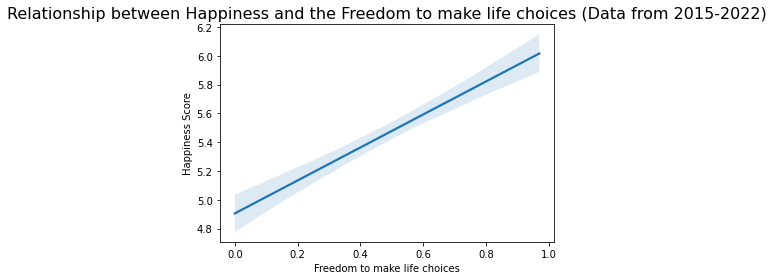

In [7]:
data = DataAllYears

# create scatter plot with regression line
sns.regplot(x='Freedom to make life choices', y='Happiness Score', data=data, scatter=False)

# add labels and title
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and the Freedom to make life choices (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

### Looking at this correlation map there is clear correlation between Freedom to Make Life choices and the level of Happiness that an area has

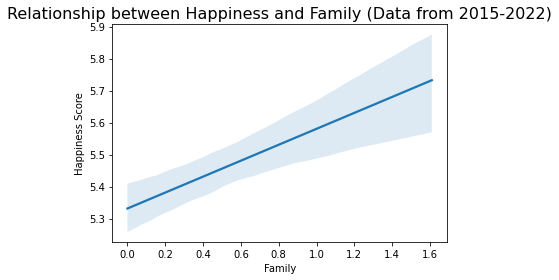

In [8]:
# create the scatter
sns.regplot(x='Family', y='Happiness Score', data=DataAllYears, x_estimator=np.mean, scatter=False)

# add labels and title
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Family (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

It appears that Family does not play much of a role in accordance to the happiness score.

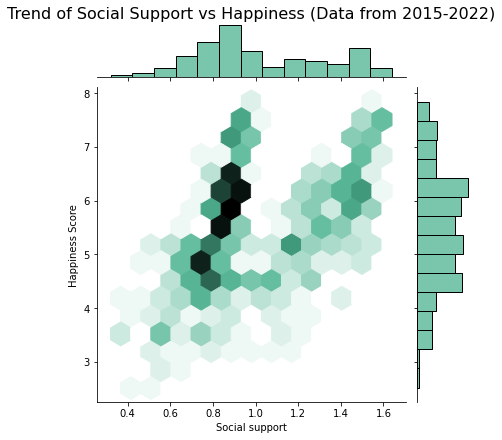

In [9]:
# filter data where Family is greater than 0
data = DataAllYears[DataAllYears['Social support'] > 0]

# create jointplot with hex bins
sns.jointplot(x='Social support', y='Happiness Score', data=data, kind="hex", color="#4CB391")

# add labels and title
plt.xlabel('Social support')
plt.ylabel('Happiness Score')
plt.title('Trend of Social Support vs Happiness (Data from 2015-2022)', fontsize=16, y=1.2)

# show plot
plt.show()

Social support has a good relation with happiness score, with a lot of points being around 0.8-1.0 ranges.

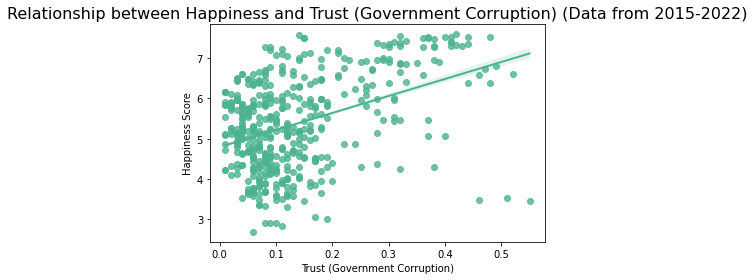

In [10]:
# filter data where Trust (Government Corruption) is greater than 0
data = DataAllYears[DataAllYears['Trust (Government Corruption)'] > 0]

# create strip plot with regression fit
sns.regplot(x='Trust (Government Corruption)', y='Happiness Score', data=data, scatter=True, ci=40, color="#4CB391", line_kws={'linewidth': 2})

# add labels and title
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Trust (Government Corruption) (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

This visual, has many data points however the trend show shows that there is good correlation in having trust in your government and happiness.

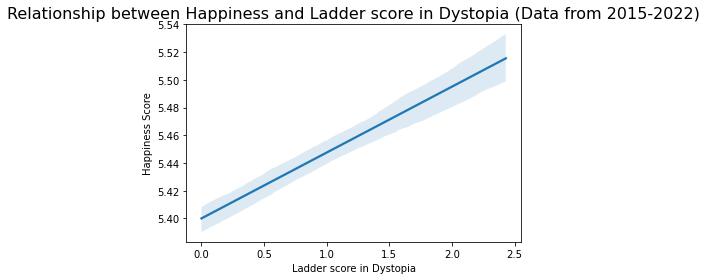

In [11]:
# create scatter plot with regression line
sns.regplot(x='Ladder score in Dystopia', y='Happiness Score', data=DataAllYears,ci=20, scatter=False)

# add labels and title
plt.xlabel('Ladder score in Dystopia')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Ladder score in Dystopia (Data from 2015-2022)', fontsize=16)

# show plot
plt.show()

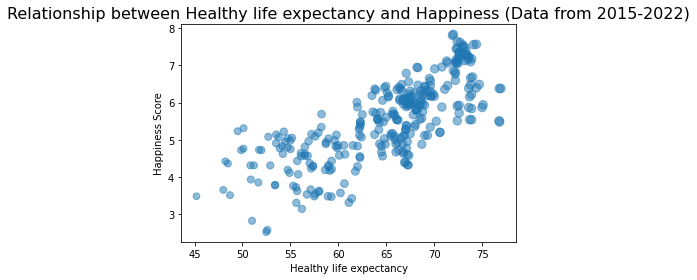

In [12]:
# filter data where Trust (Government Corruption) is greater than 0
data = DataAllYears[DataAllYears['Healthy life expectancy'] > 0]

# creating scatter plot
plt.scatter(data['Healthy life expectancy'], data['Happiness Score'], s=data['Healthy life expectancy'], alpha=0.5)

# labels and title
plt.xlabel('Healthy life expectancy')
plt.ylabel('Happiness Score')
plt.title('Relationship between Healthy life expectancy and Happiness (Data from 2015-2022)', fontsize=16)
plt.show()


This visual shows a clear diference in having a healthy life expectancy and the level of happiness of a region. As looking at this graph you can clearly see that as healthy life expectancy increases so does happiness.

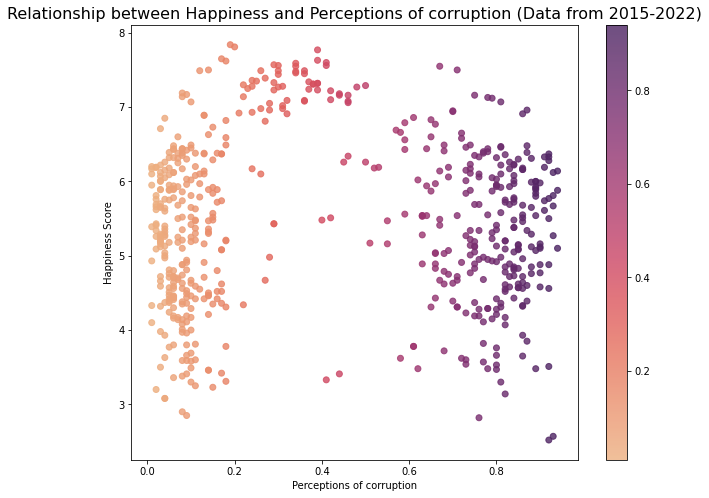

In [13]:
# Filtering the data using a lambda function
data = DataAllYears.assign(Perceptions_of_corruption_Filtered=lambda x: x['Perceptions of corruption'].apply(lambda y: y > 0))

# Create the scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(data.loc[data['Perceptions_of_corruption_Filtered'], 'Perceptions of corruption'], 
                     data.loc[data['Perceptions_of_corruption_Filtered'], 'Happiness Score'], 
                     c=data.loc[data['Perceptions_of_corruption_Filtered'], 'Perceptions of corruption'], 
                     cmap='flare', alpha=0.8)

# Adding the colour
plt.colorbar(scatter)

# Added labels and title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Relationship between Happiness and Perceptions of corruption (Data from 2015-2022)', fontsize=16)
plt.show()


This visual shows that perceptions of corruption do not have a big consideration in how happiness is measured.

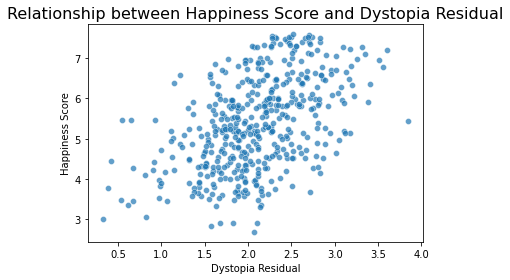

In [14]:
# Filter the data using a lambda function in assign
data = DataAllYears.assign(Dystopia_Residual_Filtered=lambda x: x['Dystopia Residual'].apply(lambda y: y != 0))

# Plot the scatterplot using a lambda function in query
sns.scatterplot(x="Dystopia Residual", y="Happiness Score", data=data.query("Dystopia_Residual_Filtered"), alpha=0.7)
plt.xlabel("Dystopia Residual")
plt.ylabel("Happiness Score")
plt.title("Relationship between Happiness Score and Dystopia Residual", fontsize=16)
plt.show()


### Data Analysis Pipeline

1. Load the data
2. Clean the data

In order to create the visuals above and below we decided it was best to clean all the data before hand and created a python filed called DataCleaner and another Data_Merger. Within this we had Method chaining to clean the data and I will give an example of what we had to do.

2017 Example:
```ruby
Clean_Data_2017 = (Raw_Data_2017
              .drop(['Whisker.high', 'Whisker.low'], axis=1)
              .rename(columns={'Happiness.Rank': 'Happiness Rank' , 'Happiness.Score': 'Happiness Score'
                              ,'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)'
                              , 'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual',
                              'Freedom': 'Freedom to make life choices'})
                )
Clean_Data_2017['Region'] = Clean_Data_2017['Country'].map(Clean_Data_2016.set_index('Country')['Region'])
Clean_Data_2017#.to_csv('../data/processed/2017_Clean_Data.csv', index=False)
```

Our data had different names for each measure of happiness because regions were incorrectly identified. Therefore, we had to manually clean the data for each year by renaming columns and dropping unnecessary ones, such as Whisker.high and Whisker.low

We also encountered an error with:
```ruby
Clean_Data_2022 = (Raw_Data_2022
        .drop(['Whisker-high', 'Whisker-low'], axis=1)
        .rename(columns={'RANK': 'Happiness Rank','Happiness score': 'Happiness Score'})
                )
Clean_Data_2022['Happiness Score'] = Clean_Data_2022['Happiness Score'].str.replace(',', '.').astype(float)
Clean_Data_2022['Dystopia (1.83) + residual'] = Clean_Data_2022['Dystopia (1.83) + residual'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: GDP per capita'] = Clean_Data_2022['Explained by: GDP per capita'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Healthy life expectancy'] = Clean_Data_2022['Explained by: Healthy life expectancy'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Freedom to make life choices'] = Clean_Data_2022['Explained by: Freedom to make life choices'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Generosity'] = Clean_Data_2022['Explained by: Generosity'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Perceptions of corruption'] = Clean_Data_2022['Explained by: Perceptions of corruption'].str.replace(',', '.').astype(float)
Clean_Data_2022['Explained by: Social support'] = Clean_Data_2022['Explained by: Social support'].str.replace(',', '.').astype(float)

Clean_Data_2022['Region'] = Clean_Data_2022['Country'].map(Clean_Data_2021.set_index('Country')['Region'])
Clean_Data_2022.to_csv('../data/processed/2022_Clean_Data.csv', index=False)
```

This 2022 data every measure was not a float and was simply a String in which we had to convert each and every one of them into a float as well as renaming the columns and dropping them similar to before.

We had to do this with every year to clean our data into what is currently is right now.

### Method Chaining

Method chaining is a powerful technique in pandas that allows us to perform multiple operations on a DataFrame in a concise and readable way. By applying the necessary cleaning and transformation steps, we have already produced clean data files for each year, so we don't need to use a load and process function to clean the data every time. Instead, we can load the processed data directly into our analysis notebook. Therefore, using method chaining and saving clean data files is a more efficient and effective approach for our project.

#### Data Analysis



After examining my graphs and data, I have concluded that there is a significant difference in the happiness levels of North America and Western Europe compared to all other regions of the world. I want to focus on comparing these regions and determining what factors contribute the most to their happiness in comparison to other regions.

Additionally, I believe that using the DataAllRegion dataset is the best option since it contains the most information while also including all the correct data on the regions.

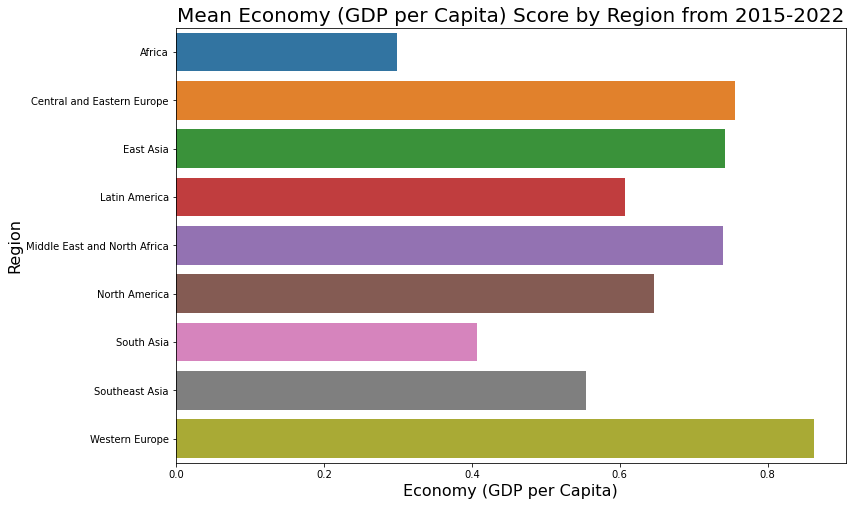

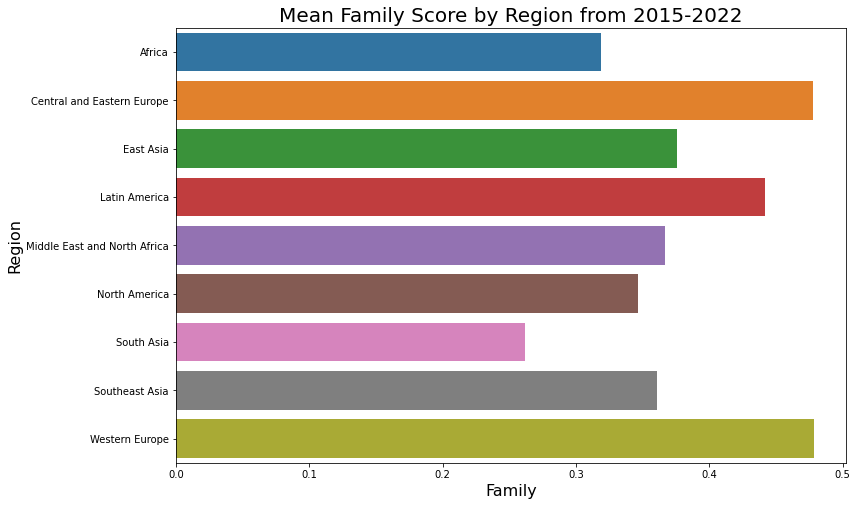

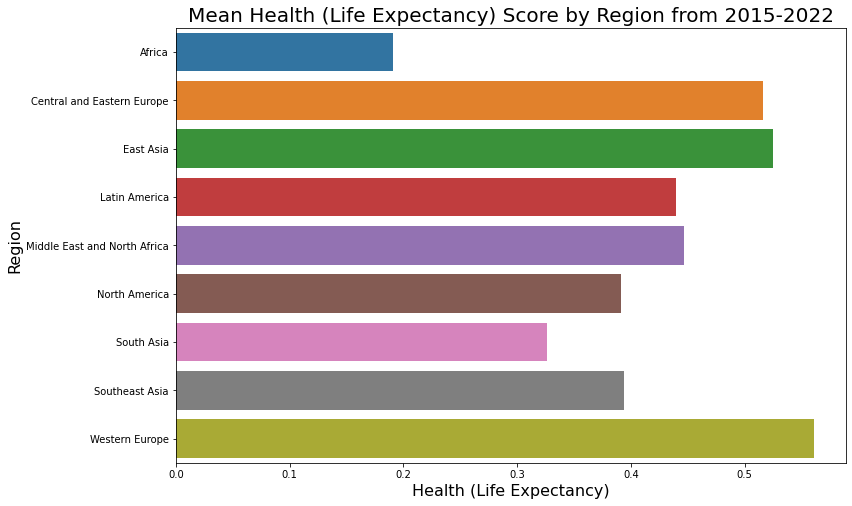

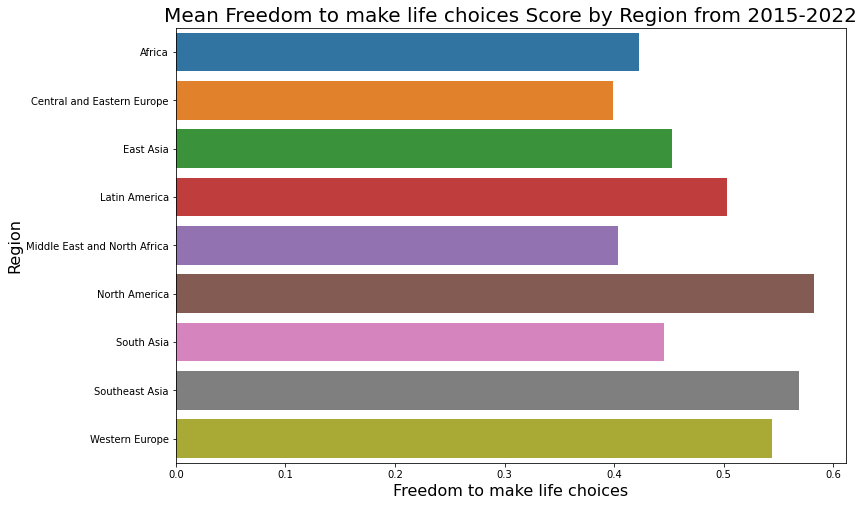

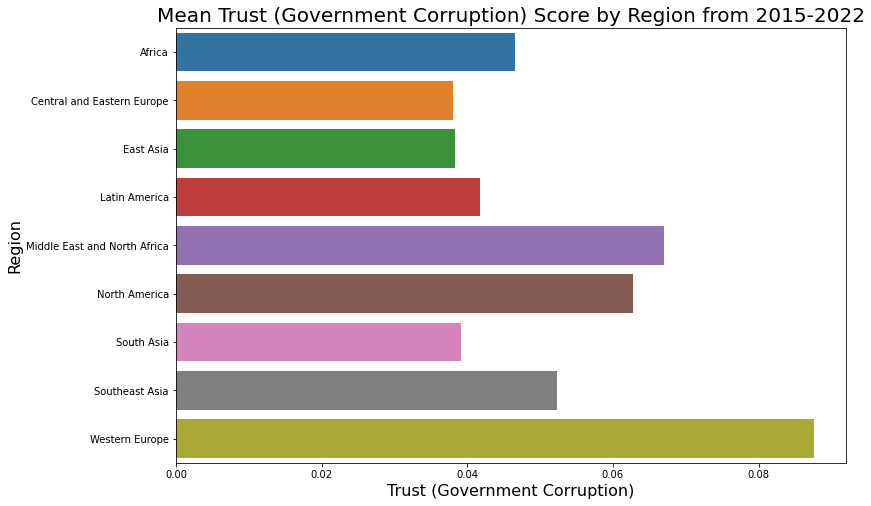

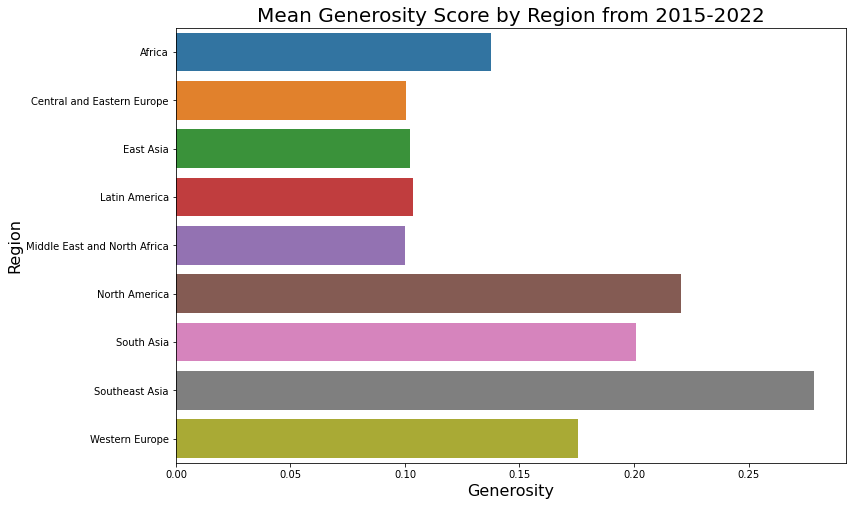

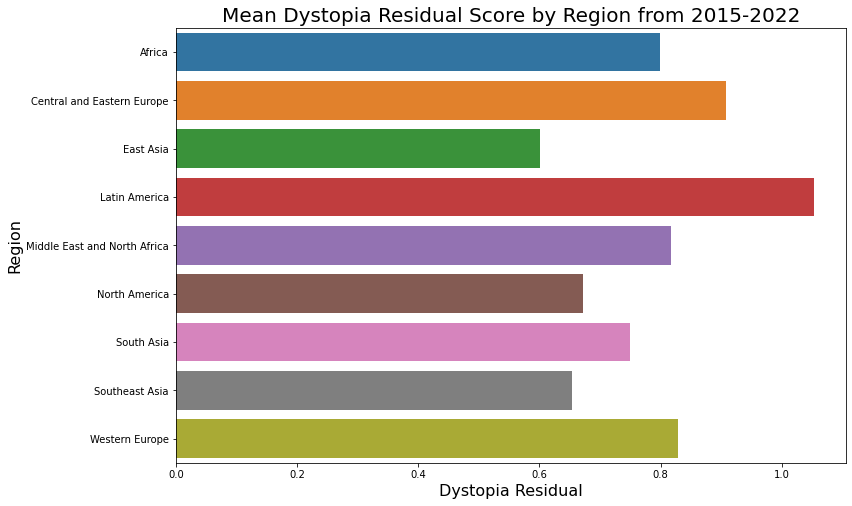

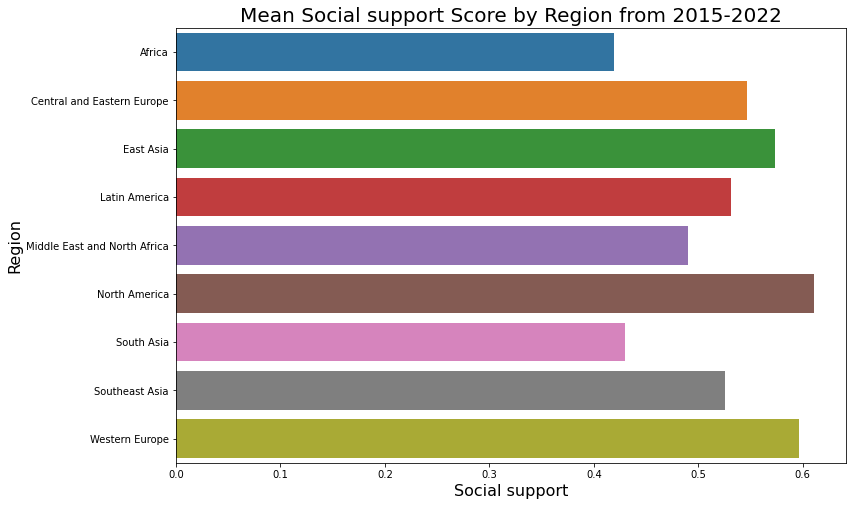

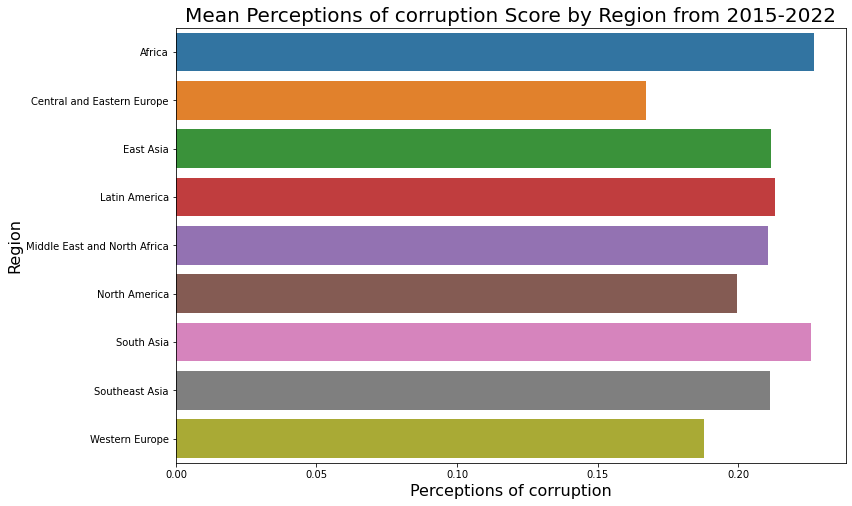

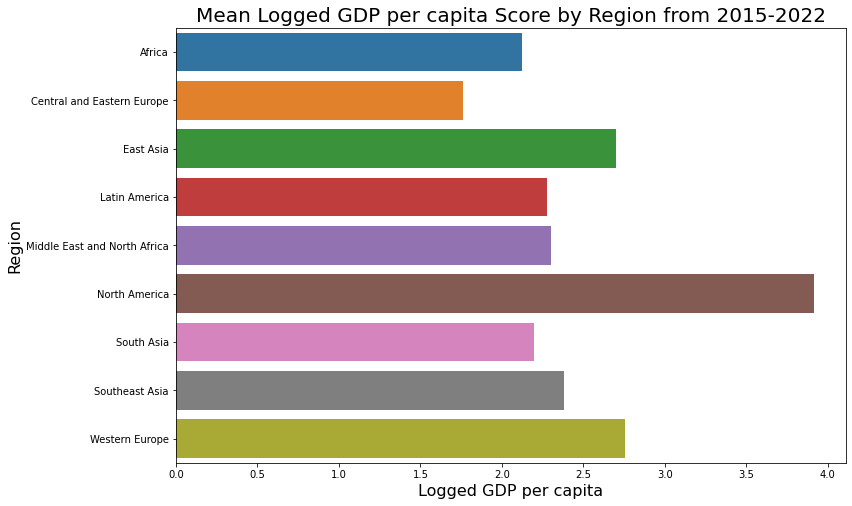

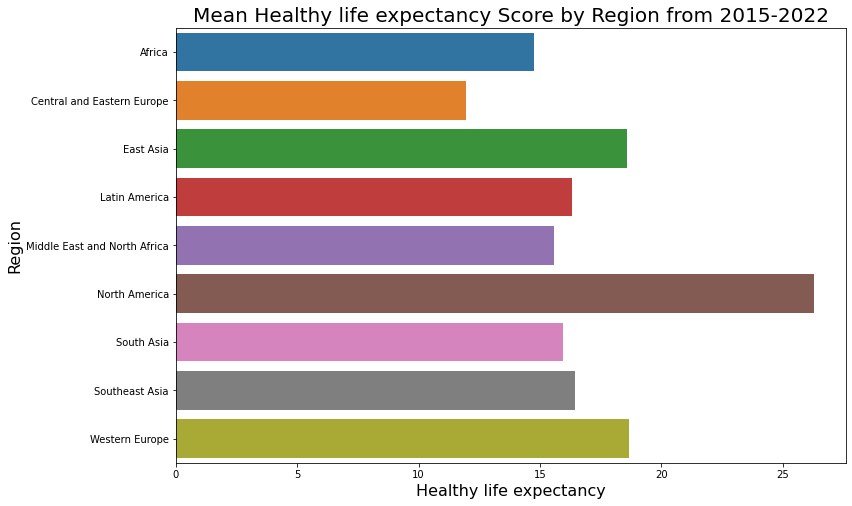

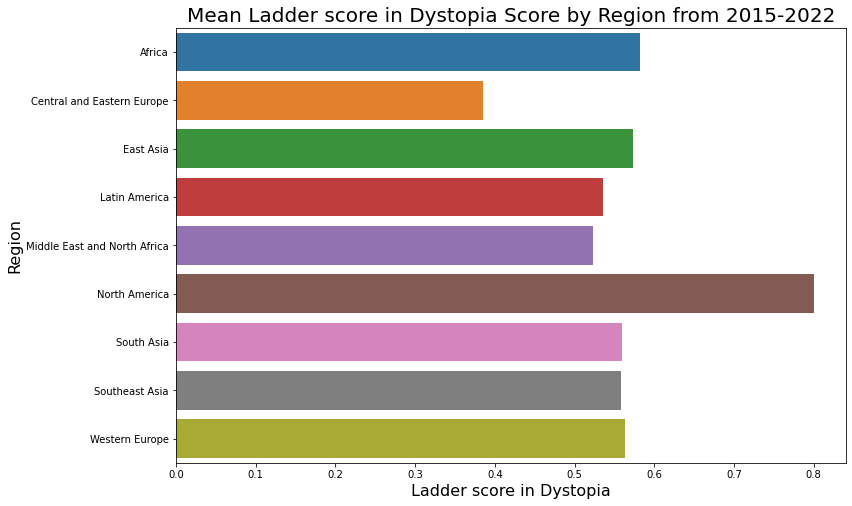

In [15]:
cols = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom to make life choices', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Social support',
       'Perceptions of corruption', 'Logged GDP per capita',
       'Healthy life expectancy', 'Ladder score in Dystopia']

for c in cols:
    pf.region_barplot(DataAllRegion,c)

### Mean Economy (GDP per capita)
With this metric, Western Europe is the greatest, followed by East Asia, Latin America, and North America in fourth. However, I do not believe that this is a good metric for happiness, as previously concluded through EDA.

### Mean Family
Family is the largest in Western Europe, followed by Central & Eastern Europe, and then Latin America. However, this metric may be somewhat obsolete, as many regions with low happiness have a high family metric.

### Mean Health (Life Expectancy)
In terms of life expectancy, Western Europe is the clear winner compared to all other regions of the world, followed by North America and then East Asia.

### Mean Freedom to make life choices
The freedom to make life choices is one of the most important aspects of an area being happy, as it allows people to do what they want. Within this metric, North America is the region with the highest freedom, followed by Southeast Asia, Latin America, and finally Western Europe.

### Mean Trust(Government Corruption)
Trust in the government is a great factor as well, as it represents how much a country trusts its own government. Within this metric, Western Europe is the clear leader compared to any other region, followed by the Middle East and North America.

### Mean Generosity
Southeast Asia is the region with the highest mean in Generosity, followed by North America, South Asia, and then Western Europe.

### Mean Dystopia Redsidual 
The region with the highest Dystopia is Latin America.

### Mean Social Support
This metric North America & Western Europe are the leaders in this category.

### Mean Perceptions of corruption
This metric every country are nearly similar however the Africa is the highest metric in this category.

### Mean Logged GDP per capita
North America is the largest in this metric as per USA is the largest economy in the world. With East Asia and Western Europe being the second up.

### Mean Healty (Life Expectancy)
Norther America the clear winner in having the best Healthy wealth exptenacy.

### Mean Ladder Score in Dystopia
Norther America is also the leader in this metric having the highest margin by a significant amount.

# Results and Conclusion
By looking at all the visualizations above and the bar graphs above I have found that, North America and Western Europe are the happiest regions in the world. The reasons for this are that North America are the leaders in Logged GDP per capita, Healty (Life Expectancy), Ladder Score in Dystopia and Social Support with Western Europe being either 2nd or 3rd in most of these rankings. As well Western Europe is the leader in Economy (GDP per capita), Health (Life Expectancy) and Trust(Government Corruption)
